In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils import * 


Bad key "text.kerning_factor" on line 4 in
/Users/yutingli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [9]:
L=1025  # system size 2**n+1
N=1000 # number of realisations

p=0.34 # prob. of hopping in the same direction as the previous hop 
q=0.33

hs = np.arange(0.1, 0.9, 0.01) 
n = int(np.floor(np.log2(L)) - 1)

edge_reach_frac = [] 
ts = [] 
mean_msds = [] 

for h in hs:
    filename = 'data_L{}_N{}_p{}_q{}_h{:.2f}.dat'.format(L, N, p, q, h)
    file = open(filename)
    realisations, moments = read_file(file, verbose=False) 
    
    times = [] 
    msds = [] 
    tot_edge_reach = 0 
    tot_possible_edge = len(realisations)*4 

    for (i, realisation) in enumerate(realisations):

        time, msd, edge_reach, coarse_grain_moments = extract_lite(realisation, n)
        times.append(time)
        msds.append(msd)
        tot_edge_reach += np.sum(edge_reach>0)
        
    edge_reach_frac.append(tot_edge_reach/tot_possible_edge)
    t = select_longest(times)[:-1] 
    mean_msd = np.mean(pad(msds), axis=0)
    
    ts.append(t) 
    mean_msds.append(mean_msd)

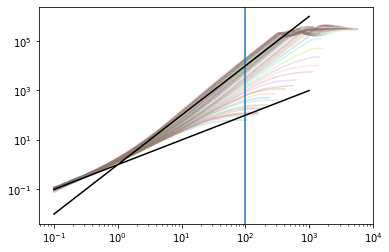

In [21]:
for (t, m) in zip(ts, mean_msds): 
    if len(t) == len(m):
        plt.plot(t, m, alpha=0.2)
plt.axvline(x=1e2)

x = np.array(t)
x = x[x<1e3] 
plt.plot(x, x**2, color='k')
plt.plot(x, x, color='k')
plt.xscale('log')
plt.yscale('log')
plt.show() 

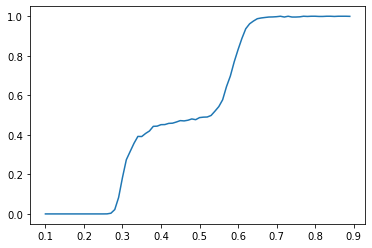

In [7]:
plt.plot(hs, edge_reach_frac)
plt.show() 